# Hackathon - Quelle(s) énergie(s) pour demain ?

*Equipe*: Chloé Younes, Nicolas Louis, Antoine Hue, Vincent Martinez, Thomas Mensch

Dans cette étude, nous essayons de mettre en évidence une relation entre la consommation et la production d'énergie en France avec les investissements publics en R&D dans le domaine de l'énergie.
La question que nous nous sommes posés est de savoir si l'effort d'investissement dans la recherche publique dans le domaine de l'énergie renouvelable influence la transition énergétique.

Nous commençons par dresser un état des lieux de la consommation d'énergie par secteur d'activité sur les 15 dernieres années, ainsi que sur les sources de production énergétique. Ensuite nous présentons les efforts de recherche de la France dans le domaine de l'énergie en nous concentrons sur les énergies renouvelables.
Enfin nous tentons de d'identifier un lien entre les efforts de recherche et la production d'énergie.

*Sources*:
 - data.gouv.fr
 - https://www.statistiques.developpement-durable.gouv.fr/

## Plan

 1. Etat des lieux
  - Consommation par secteur d'activité
  - Production énergétique par type d'énergie
 2. Investissement R&D en France dans le domaine de l'énergie
 3. Tentative de corrélation entre investissements R&D et production d'énergie dans le domaine du renouvelable
 


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import itertools
from bs4 import BeautifulSoup
import requests

plt.rcParams['figure.figsize'] = [20, 12]

## Etat des lieux

### Consommation par secteur

In [3]:
df_01 = pd.read_excel('data/series-longues-bilan-energetique-2018-donnees-provisoires-revisees-au-16-10-2019.xls')

In [4]:
# clean data
df_clean = df_01[df_01['LIBSERIE'].str.contains("Consommation|consommation")].copy()

df_clean = df_clean[df_clean['NIVGEO'].str.contains("Métropole")]

targets = ['industrie', 'tertiaire', 'résidentiel', 'transport', 'agriculture']

df_clean = df_clean[df_clean['LIBSERIE'].str.contains('finale')]

df_clean = df_clean[df_clean['LIBSERIE']
                    .apply(lambda sentence: any(word in sentence for word in targets))]

df_clean = df_clean[~df_clean['TYPFLUX'].str.contains('Résidentiel-tertiaire|Résidentiel-Tertiaire|Consommation finale')]

df_clean = df_clean[df_clean['TYPDONNEE'] == 'Réelles']

df_clean = df_clean[~df_clean['ENERGIE'].str.contains('Chaleur vendue|Toutes énergies')]

df_clean = df_clean[df_clean['UNITE'] == 'Mtep']

df_clean = df_clean[~df_clean['LIBSERIE'].str.contains('aérien|routier|ferroviaire|maritime')]

In [8]:
dffinal = df_clean.groupby(['TYPFLUX', 'ENERGIE']).sum()
columns = [str(i) for i in range(1990, 2018)]

dffinal = dffinal[columns]
dffinal

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


1990       1991       1992       1993  \
TYPFLUX     ENERGIE                                                      
Agriculture Charbon          0.000000   0.000000   0.000000   0.000000   
            EnR et déchets   0.044401   0.044401   0.044999   0.044855   
            Gaz naturel      0.136049   0.197571   0.230525   0.207309   
            Pétrole          3.542000   3.500000   3.537000   3.639000   
            Électricité      0.181083   0.194927   0.197248   0.192175   
Industrie   Charbon          3.335182   3.252862   3.243429   2.494572   
            EnR et déchets   1.496202   1.508622   1.510700   1.413156   
            Gaz naturel      9.190069   9.775215   9.791187   9.669970   
            Pétrole          6.560000   6.882000   6.728000   7.316000   
            Électricité      9.859501  10.055546  10.408598  10.373861   
Résidentiel Charbon          0.999368   1.067538   0.859682   0.784240   
            EnR et déchets   8.208871   9.726163   9.382751   9.049967   
            Gaz naturel      0.000000   0.000000   0.000000   0.000000   
            Pétrole         10.957000  11.677000  11.286000  10.587000   
            Électricité      8.332588   9.184609   9.423302   9.584695   
Tertiaire   Charbon          0.685476   0.731240   0.589527   0.545093   
            EnR et déchets   0.047960   0.046838   0.047315   0.049799   
            Gaz naturel      0.000000   0.000000   0.000000   0.000000   
            Pétrole          5.097000   5.522000   5.434000   5.104000   
            Électricité      6.971367   7.554342   7.718229   7.803525   
Transport   Charbon          0.000000   0.000000   0.000000   0.000000   
            EnR et déchets   0.000000   0.000000   0.002866   0.025141   
            Gaz naturel      0.000150   0.000150   0.000150   0.001075   
            Pétrole         37.843000  38.911000  39.700000  40.027000   
            Électricité      0.642562   0.642734   0.655632   0.644024   

                                 1994       1995       1996       1997  \
TYPFLUX     ENERGIE                                                      
Agriculture Charbon          0.000000   0.000000   0.000000   0.000000   
            EnR et déchets   0.044999   0.045261   0.045142   0.045070   
            Gaz naturel      0.187747   0.196647   0.207309   0.210791   
            Pétrole          3.562000   3.576000   3.667000   3.643000   
            Électricité      0.225279   0.225107   0.248237   0.234222   
Industrie   Charbon          2.290202   2.081532   2.299414   2.081411   
            EnR et déchets   1.508861   1.530978   1.496441   1.604089   
            Gaz naturel      9.595744  10.306492  10.811737  11.157911   
            Pétrole          6.806000   6.790000   7.303000   6.670000   
            Électricité     10.397077  10.628289  10.708512  10.980138   
Résidentiel Charbon          0.623471   0.569303   0.612113   0.536131   
            EnR et déchets   7.848070   7.962907   8.700296   7.627998   
            Gaz naturel      0.000000   0.000000   0.000000   0.000000   
            Pétrole          9.631000   9.616000  10.304000   9.643000   
            Électricité      9.563285   9.358727  10.361909  10.239381   
Tertiaire   Charbon          0.434064   0.390869   0.420512   0.367389   
            EnR et déchets   0.050373   0.204858   0.214388   0.234547   
            Gaz naturel      0.000000   0.000000   0.000000   0.000000   
            Pétrole          4.733000   4.832000   5.145000   4.782000   
            Électricité      8.163629   8.602666   8.541273   8.357438   
Transport   Charbon          0.000000   0.000000   0.000000   0.000000   
            EnR et déchets   0.081636   0.160049   0.230314   0.275719   
            Gaz naturel      0.000623   0.000387   0.000387   0.000301   
            Pétrole         40.273000  40.520000  40.423000  41.235000   
            Électricité      0.669905   0.665004   0.736285   0.752709   

                                 19

In [22]:
dftest = dffinal.transpose()

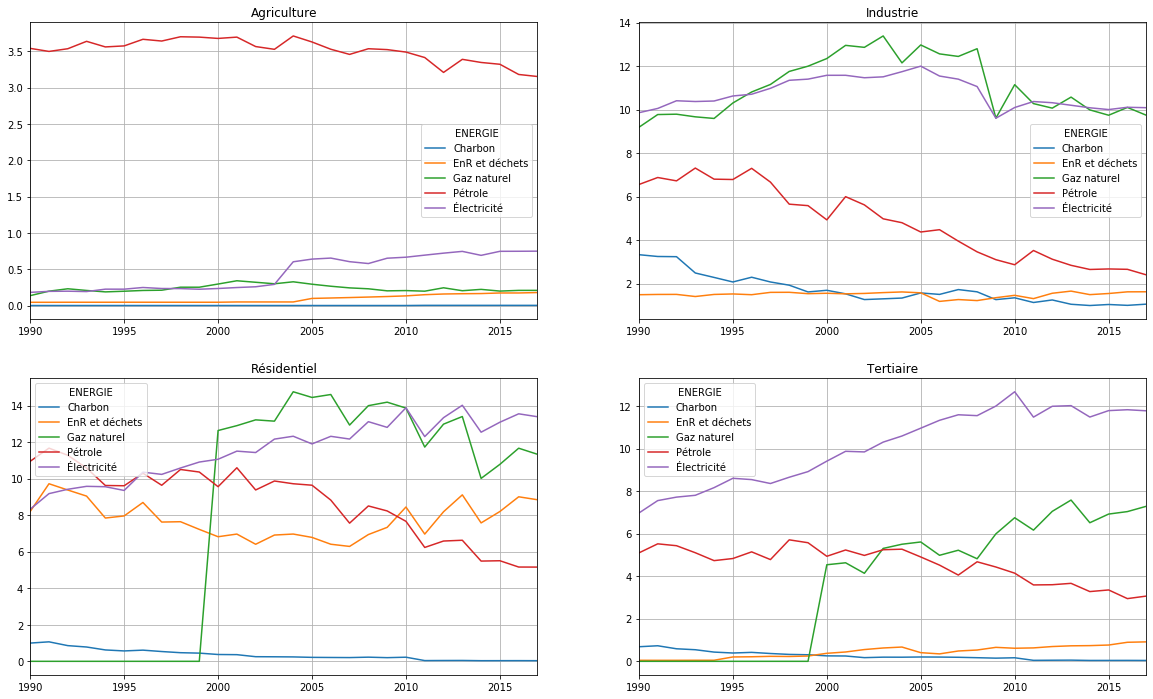

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for e, ax in zip(dftest.columns.get_level_values(0).unique(), axes.reshape(-1)):
    dftest[e].plot(ax=ax)
    ax.grid()
    ax.set_title(e)
    
plt.show()

### Production énergétique en France

In [103]:
# Select production e
production_elec = df_01[(df_01["LIBSERIE"].str.contains("Production nette d'électricité"))\
                        & (df_01["NIVGEO"] == "Métropole")\
                        & (df_01["UNITE"] == "Mtep")].rename(columns={"LIBSERIE":"Type de production"})

In [104]:
columns = [str(i) for i in range(1990, 2019)]
columns +=["Type de production"]
production_elec = production_elec[columns]

# transpose
production_elec = production_elec.set_index("Type de production").transpose().dropna(axis=1)

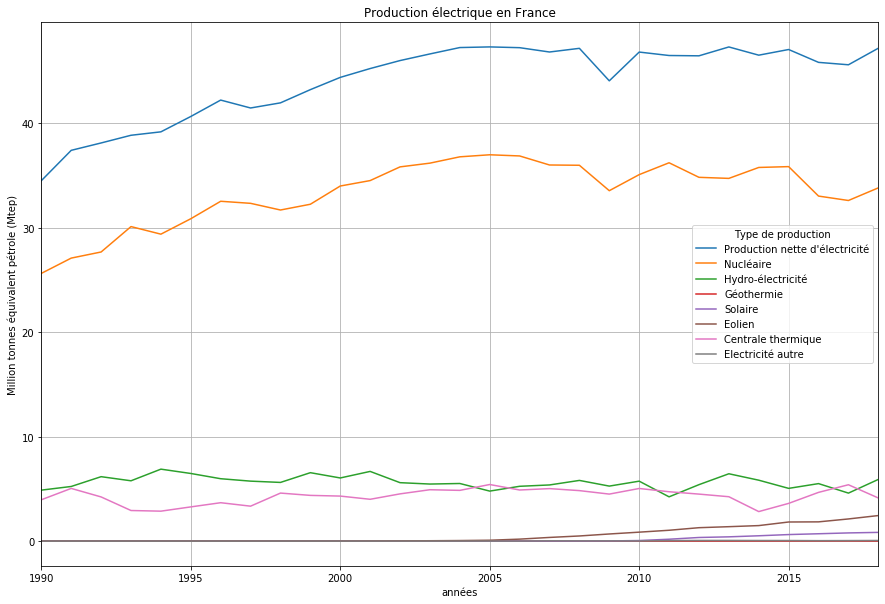

In [105]:
nommage_colonne = {"Production nette d'électricité hydraulique (y compris pompages)":"Hydro-électricité",
                   "Production nette d'électricité géothermique":"Géothermie",
                   "Production nette d'électricité solaire photovoltaïque":"Solaire",
                   "Production nette d'électricité éolienne": "Eolien",
                   "Production nette d'électricité des centrales thermiques classiques": "Centrale thermique",
                   "Production nette d'électricité, autres sources": "Electricité autre",
                   "Production nette d'électricité nucléaire":"Nucléaire"
                  }

production_elec = production_elec.rename(columns=nommage_colonne)

# display
#fig = plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1, figsize=(15, 10))

production_elec.plot(ax=ax)

plt.grid()
plt.title("Production électrique en France")
plt.xlabel("années")
plt.ylabel("Million tonnes équivalent pétrole (Mtep)")

plt.show()

In [106]:
consomation_finale = df_01[(df_01["NIVGEO"] == "Métropole") \
                           & (df_01["UNITE"] == "Mtep") \
                           & (df_01["TYPFLUX"]=="Consommation finale")
                           & df_01["ENERGIE"].str.contains("Charbon|Électricité|EnR et déchets|Gaz naturel|Pétrole") \
                           & (df_01["TYPDONNEE"]=="Réelles") ].rename(columns={"LIBSERIE":"Type de production"})
#consomation_finale

In [107]:
consomation_finale = consomation_finale[columns]
consomation_finale.fillna(0)
consomation_finale = consomation_finale.set_index("Type de production").transpose()

In [108]:
total = consomation_finale.join(production_elec)

nommage_colonne = {
    "Consommation finale de charbon, tous usages confondus": "Charbon",
    "Consommation finale d'énergies renouvelables thermiques et déchets, tous usages confondus": "Biomasse et déchets",
    "Consommation finale de gaz naturel, tous usages confondus": "Gaz naturel",
    "Consommation finale de produits raffinés, tous usages confondus": "Pétrole"
}
total = total.rename(columns=nommage_colonne)
total = total.drop(columns=["Production nette d\'électricité","Consommation finale d\'électricité, tous usages confondus"] )

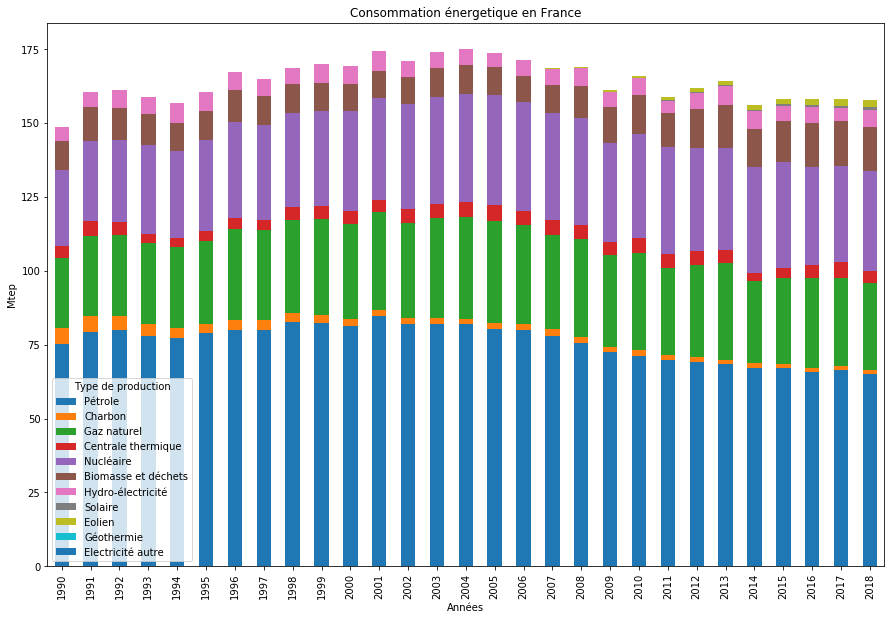

In [109]:
#total.plot(kind='bar', stacked=True)

select_cols = ['Pétrole', 'Charbon', 'Gaz naturel', 'Centrale thermique', 'Nucléaire',
               'Biomasse et déchets', 'Hydro-électricité', 'Solaire', 'Eolien', 'Géothermie', 'Electricité autre']

#fig = plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, figsize=(15, 10))

total.reindex(columns=select_cols).plot(kind='bar', stacked=True, ax=ax)

plt.title("Consommation énergetique en France")
plt.xlabel("Années")
plt.ylabel("Mtep")

plt.show()

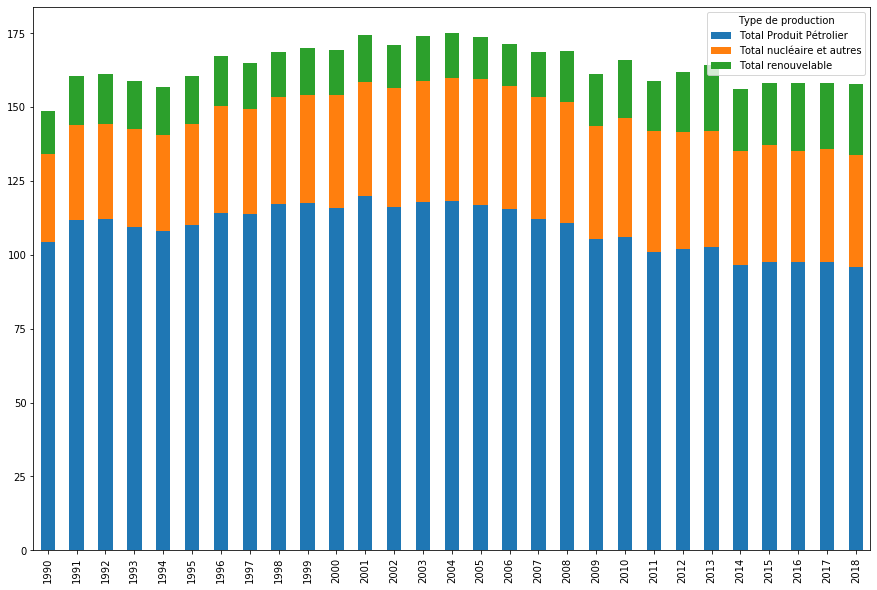

In [110]:
renouvelable = total[["Biomasse et déchets","Hydro-électricité","Géothermie","Solaire", "Eolien"]]
renouvelable.to_csv('data/prodconso_renouvelable.csv')
non_renouvelable = total.drop(columns=renouvelable.columns)
total["Total renouvelable"] = renouvelable.sum(axis=1)

carbonate = non_renouvelable[["Charbon", "Gaz naturel", "Pétrole"]]
total["Total Produit Pétrolier"] = carbonate.sum(axis=1)
total["Total nucléaire et autres"] = non_renouvelable.drop(columns = carbonate.columns).sum(axis=1)

fig, ax = plt.subplots(1, figsize=(15, 10))
total[["Total Produit Pétrolier","Total nucléaire et autres","Total renouvelable"]].plot(kind='bar', stacked=True, ax=ax)

## Dépense R&D public dans le domaine de l'énergie

Nous avons cherché des données sur les investissements privés en R&D dans le domaine de l'énergie.
Malheureusement nous n'avons pas trouvé de données consolidées au niveau national.

In [64]:
df = pd.read_excel('data/depPubRD2018.xls',
                   sheet_name='R&D Nomenclature AIE',  skiprows=2)

In [65]:
df.rename(columns={'Unnamed: 0': 'Level 1',
                   'Unnamed: 1': 'Level 2',
                   'Unnamed: 2': 'Level 3',
                   'Unnamed: 3': 'Level 4'}, inplace=True)

In [66]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [67]:
df['is_level1'] = ~df.iloc[:, 0].isnull()
df['is_level2'] = ~df.iloc[:, 1].isnull()
df2 = df[(df['is_level1'] == True) | (df['is_level2'] == True)].copy()

In [68]:
col = ['Level 1', 'Level 2']
df2.loc[:, col] = df2.loc[:, col].ffill()

In [69]:
df_l1 = df2[(df2['is_level1'] == True)].copy()
df_l1 = df_l1.drop(['Level 3', 'Level 4'], axis=1)
df_l1.drop(['Level 2', 'is_level1', 'is_level2'], axis=1, inplace=True)

#### PIB par scrapping de wikipedia

In [70]:
URL = "https://fr.wikipedia.org/wiki/Produit_int%C3%A9rieur_brut_de_la_France"

def get_soup_from_url(url):
    return BeautifulSoup(requests.get(url).content, 'html.parser')


def get_pib():
    annee = range(2002, 2019)
    soup = get_soup_from_url(URL)

    table = soup.find_all('table', class_="wikitable")
    table_pib = table[2]
    table_pib2 = table[3]

    dico = {}

    rows = table_pib.find_all('tr')[1:]
    for r in rows:
        cells = r.find_all('td')
        year = int(cells[0].text.replace('\n', ''))
        if year in annee:
            value = float(cells[1].text.replace(
                '\n', '').replace(',', '.').replace(' ', ''))
            dico[year] = value

    rows = table_pib2.find_all('tr')[1:]
    for r in rows:
        cells = r.find_all('td')
        year = int(cells[0].text.replace('\n', ''))
        if year in annee:
            value = float(cells[1].text.replace(
                '\n', '').replace(',', '.').replace(' ', ''))
            dico[year] = value

    return dico

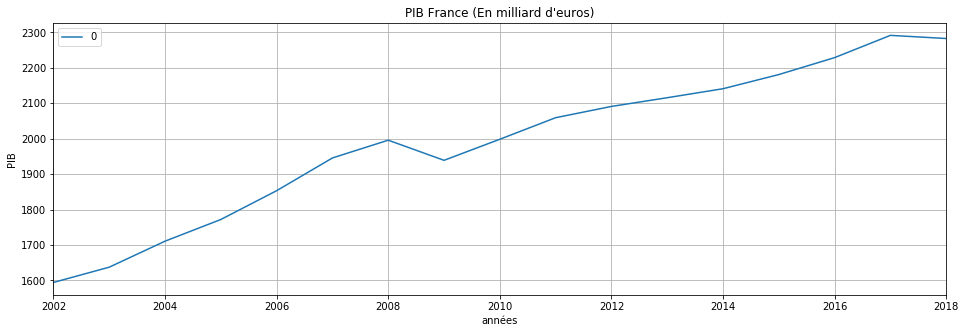

In [71]:
df_pib = pd.DataFrame.from_dict(get_pib(), orient='index')

fig, ax = plt.subplots(1, figsize=(16, 5))

df_pib.plot(ax=ax)
plt.grid()
plt.title("PIB France (En milliard d'euros)")
plt.xlabel('années')
plt.ylabel('PIB')

plt.show()

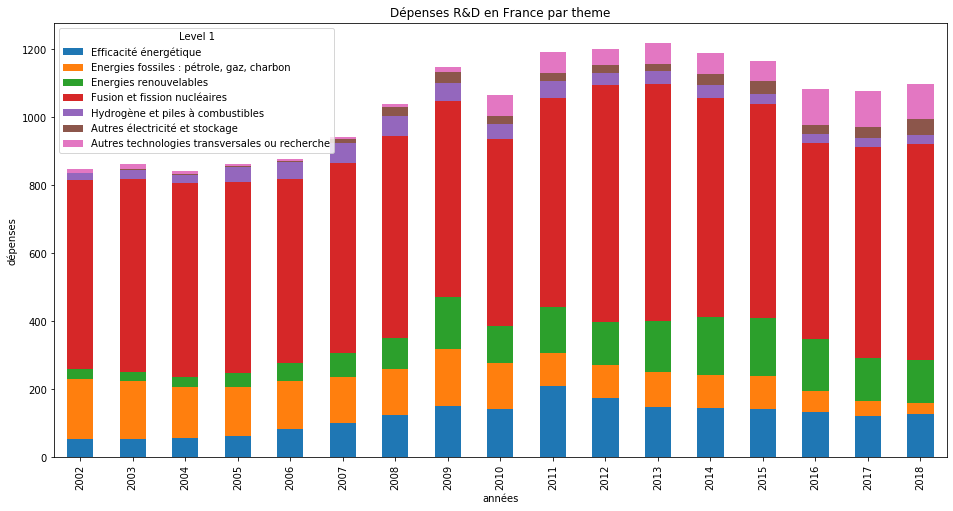

In [72]:
fig, axes = plt.subplots(1, figsize=(16,8))

df_trans = df_l1.set_index('Level 1').transpose()

df_trans.drop(['Budget total'], axis=1, inplace=True)

plt.title("Dépenses R&D en France par theme",)
plt.xlabel('années')
plt.ylabel('dépenses')

df_trans.plot(ax= axes, kind='bar', stacked=True);

### => On note une croissance relative 

In [73]:
df_zoom = df_trans[df_trans.columns[1:4]]

dico = {'Energies fossiles : pétrole, gaz, charbon': 'Energies fossiles',
        'Energies renouvelables': 'Energies renouvelables',
        'Fusion et fission nucléaires': 'Energies nucléaires'}

df_zoom = df_zoom.rename(columns=dico)

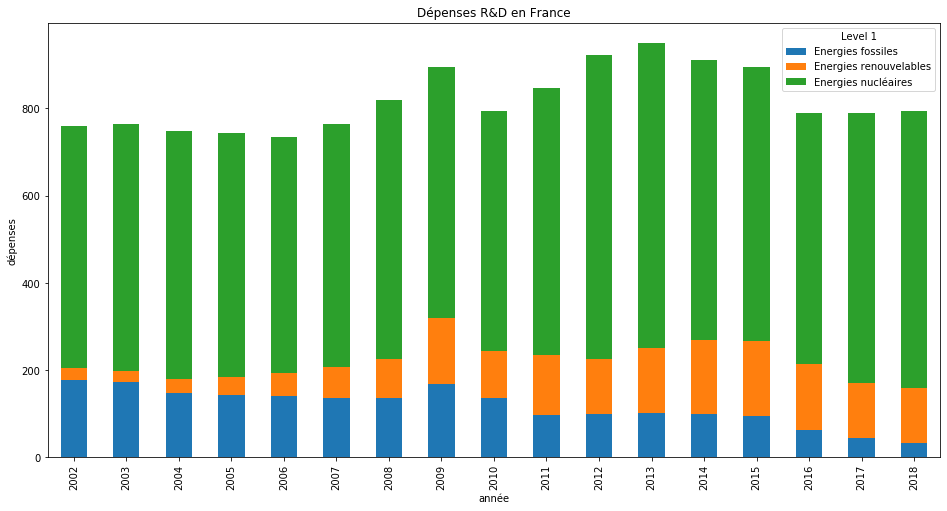

In [74]:
fig, axes = plt.subplots(1, figsize=(16,8))

plt.title("Dépenses R&D en France")
plt.xlabel('année')
plt.ylabel('dépenses')

df_zoom.plot(ax= axes, kind='bar', stacked=True);

In [75]:
# Select details renewables
df_l2 = df2[(df2['is_level2'] == True)].copy()

df_l2 = df_l2.drop(['Level 3', 'Level 4'], axis=1)

In [76]:
df_renouv = df_l2[df_l2['Level 1']=='Energies renouvelables'].copy()

df_renouv.drop('Level 1', inplace=True, axis=1)

In [77]:
df_transp_renouv = df_renouv[df_renouv.columns[:18]].set_index('Level 2').transpose()

df_transp_renouv.drop(['Non alloué', 'Autres'], axis=1, inplace=True)

#df_transp_renouv.to_excel('NRJ renouvelables zoom.xlsx')

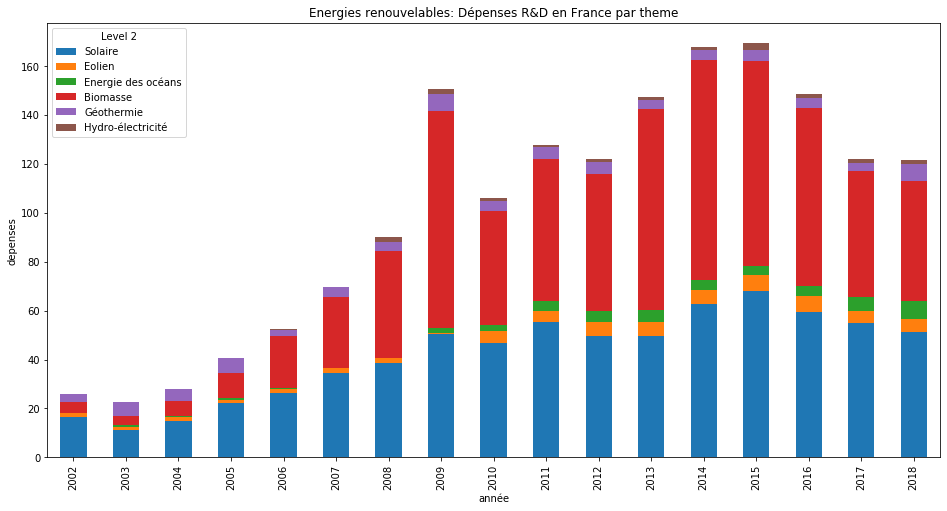

In [78]:
#df_trans['Energies renouvelables'].to_parquet('NRJ renouvelables')
fig, axes = plt.subplots(1, figsize=(16,8))

plt.title("Energies renouvelables: Dépenses R&D en France par theme")
plt.xlabel('année')
plt.ylabel('depenses')

df_transp_renouv.plot(ax= axes, kind='bar', stacked=True);

### Comparaison de la répartition des dépenses dans les énergies renouvelables

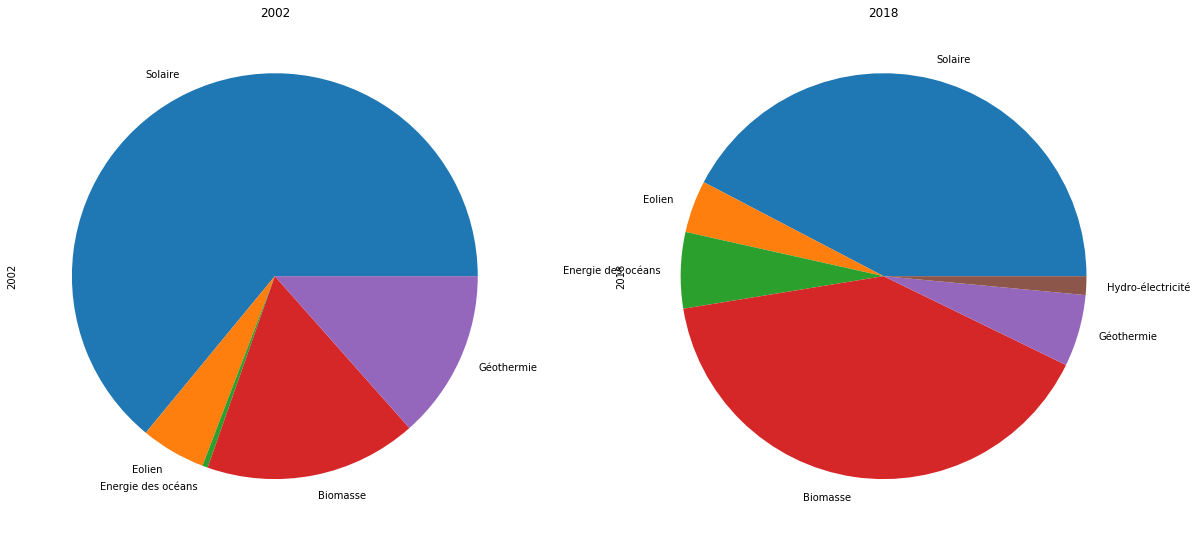

In [79]:
df_transp_renouv_pie = df_renouv[df_renouv.columns[:18]].set_index('Level 2')

df_transp_renouv_pie.drop(['Non alloué', 'Autres'], axis=0, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(20,10))
    
df_transp_renouv_pie.plot.pie(y='2002',
                              ax=axes[0], legend=False)
axes[0].set_title('2002')

df_transp_renouv_pie.plot.pie(y='2018',
                              ax=axes[1], legend=False)
axes[1].set_title('2018');

## 3. Corrélation Energies Renouvelables

In [80]:
dfRD = pd.read_excel('data/NRJ renouvelables zoom.xlsx')[:17]
dfRD.rename(columns={'Unnamed: 0':'Année'}, inplace=True)
dfRD.set_index('Année', inplace=True)

In [81]:
annees = np.arange(2002, 2019).reshape(-1,1)
anneeRef = 2002

#### Energies renouvelables en relatif avec indice 1 en 2002

In [82]:
dfSelectionRD = dfRD[['Biomasse', 'Hydro-électricité', 'Solaire', 'Eolien']]
refRD = dfSelectionRD.loc[anneeRef:anneeRef].values
indiceRD2002 = dfSelectionRD.values / (refRD+1) # hack for divide by zeros, add 1 on millions
dfIndiceRD2002 = pd.DataFrame(np.hstack((annees, indiceRD2002)))
dfIndiceRD2002.columns = dfSelectionRD.reset_index().columns
dfIndiceRD2002.set_index('Année', inplace=True)

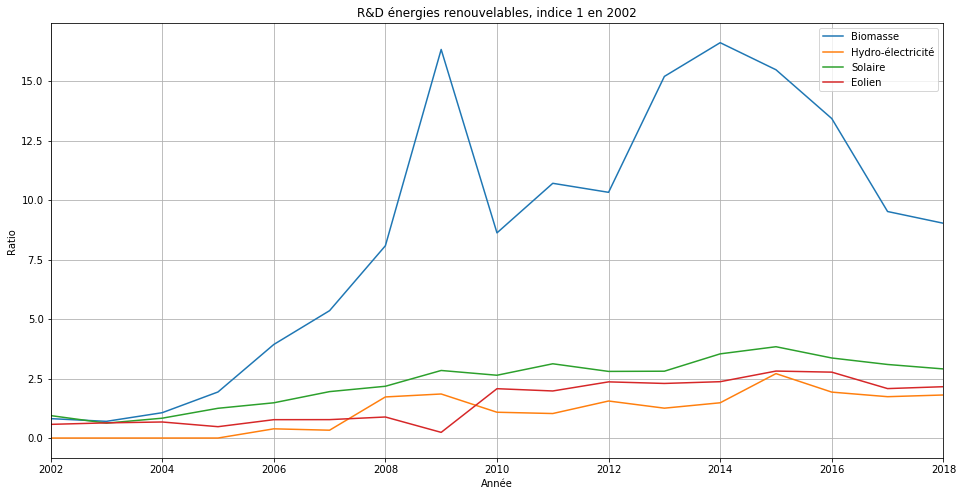

In [83]:
fig, ax = plt.subplots(1, figsize=(16, 8))
dfIndiceRD2002.plot(ax=ax)
ax.set_xlabel('Année')
ax.set_ylabel('Ratio')
ax.set_title("R&D énergies renouvelables, indice 1 en %d" % anneeRef)
ax.grid()

### Production énergie renouvelables

In [94]:
dfProdConso = pd.read_csv('data/prodconso_renouvelable.csv')
dfProdConso.rename(columns={'Unnamed: 0': 'Année'},
                   inplace=True)


dfProdConso = dfProdConso[dfProdConso['Année'] >= 2002].set_index('Année')

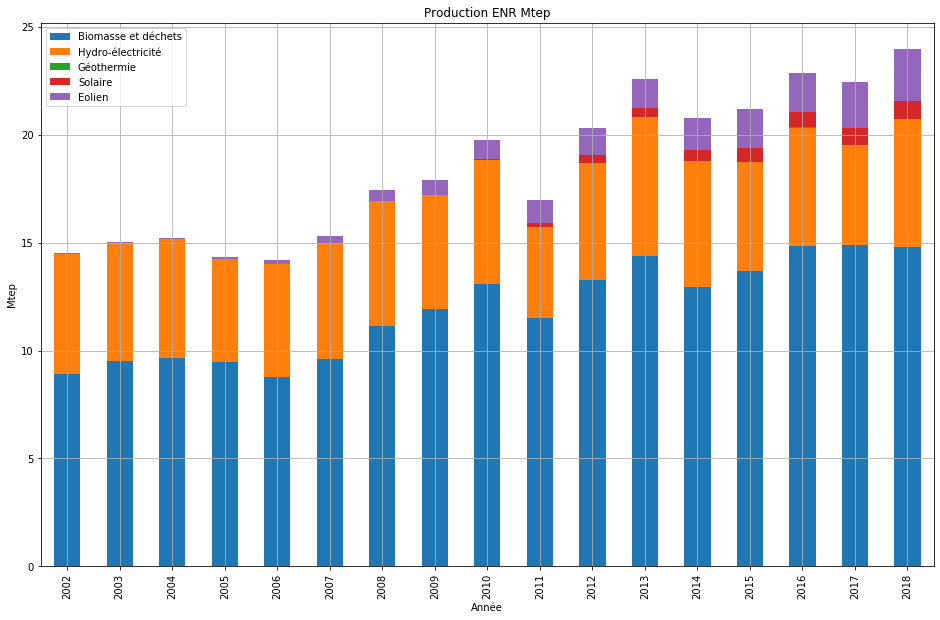

In [95]:
fig, ax = plt.subplots(1, figsize=(16, 10))

dfProdConso.plot(ax=ax, kind='bar', stacked=True)
ax.set_xlabel('Année')
ax.set_ylabel('Mtep')
ax.set_title("Production ENR Mtep")
ax.grid()

#### Progression de la production d'énergies renouvelables après 2002

In [98]:
dfSelectionProd = dfProdConso[['Biomasse et déchets', 'Hydro-électricité', 'Solaire', 'Eolien']]

refProd = dfSelectionProd.loc[anneeRef:anneeRef].values
prodIndice2002 = dfSelectionProd.values - refProd

dfProdIndice2002 = pd.DataFrame(np.hstack((annees, prodIndice2002)))

dfProdIndice2002.columns = dfSelectionProd.reset_index().columns
dfProdIndice2002.set_index('Année', inplace=True)

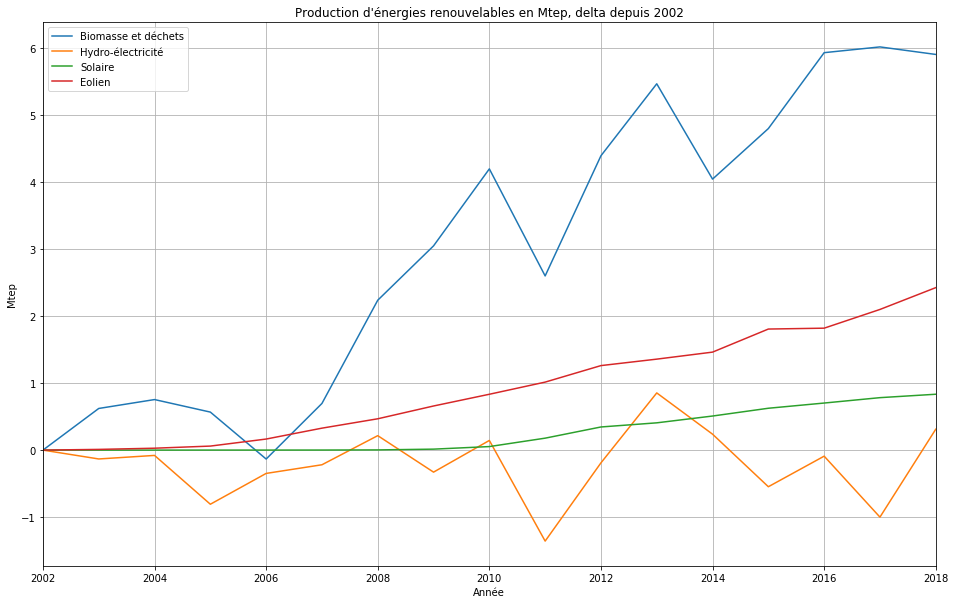

In [99]:
fig, ax = plt.subplots(1, figsize=(16, 10))

dfProdIndice2002.plot(ax=ax)

ax.set_xlabel('Année')
ax.set_ylabel('Mtep')
ax.set_title("Production d'énergies renouvelables en Mtep, delta depuis %d" % anneeRef)
ax.grid()

On observe une forte évolution, en valeur absolue, de la biomasse. Une évolution lente mais constante de l'éolien et du solaire. Il n'y a aucune tendance sur l'hydrolique, qui est une technologie mature, et qui dépend de la pluviométrie.

## Convolution sur les valeurs

Les données d'investissement en R&D et de production d'énergies renouvelables sont convoluées afin d'évaluer la vitesse (le delta en année) et la force du retour sur investissement.

- L'investissement en R&D est cumulatif dans le temps, les données sont donc normalisées par l'investissement à la date de référence (2002)
- La production est consommée de manière instantanée, et donc c'est l'évolution par rapport à la date de référence qui est utilisée

In [100]:
valRD = dfSelectionRD.values + 0.1
valProd = dfSelectionProd.values - refProd
n = valRD.shape[0]
p = valRD.shape[1]
d = n
correlateAbs = np.ones((d, p))
for i in range(p):
    correlateAbs[:, i] = np.convolve(valRD[:, i], valProd[:, i], mode='same') 
correlateAbs = correlateAbs / valRD

In [101]:
dfCorrelateAbs = pd.DataFrame(correlateAbs)
dfCorrelateAbs.columns = dfProdIndice2002.columns

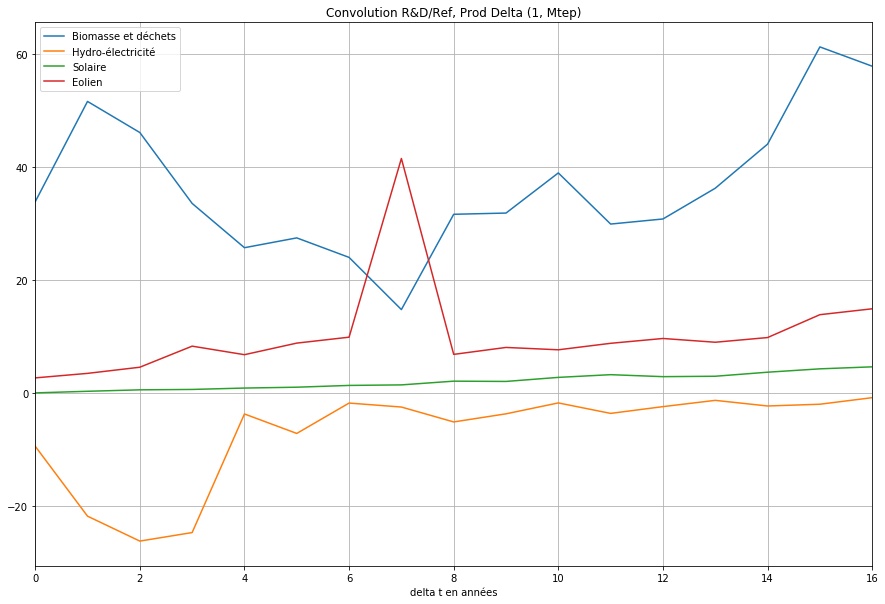

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
dfCorrelateAbs.plot(ax=ax)
ax.set_title('Convolution R&D/Ref, Prod Delta (1, Mtep)')
ax.set_xlabel('delta t en années')
ax.grid()

Ce dernier graphique nous montre la corrélation entre les dépenses en R&D par rapport à la progression de la production. Il est clair qu'aujourd'hui, les investissements sur l'hydro-electricité n'est pas encore rentable. De pus, le solaire a un faible taux de retour sur investissement. L'éolien montre une progression lente mais assez soutenu. Et les efforts sur la thématique biomasse montrent un fort retour en production sur ces 15 années.

## Conclusion

Au delà de la confirmation de certaines tendances comme la réduction des hydrocarbures et gaz, et certains état comme la R&D et la production d'énergie nucléaire, il y a eu 2 surprises sur cette étude : 

- La biomasse et la combustion de déchets sont en forte progression et sont soutenues par une R&D importante

- Le solaire est aussi soutenu par une R&D importante, mais ne porte pas autant ses fruits actuellement

De son coté, l'éolien profite d'une R&D plus réduite, mais effectue une progeression soutenue et au dessus du solaire


Référence sur les ENR:
http://www.enr.fr/valorisation-energetique-des-dechets